In [1]:
import time
from DUT import DUT
import matplotlib.pyplot as plt
import numpy as np
import json
import sys

In [2]:
my_dut = DUT(20, True, 3.2)

my_dut.defected_meas

array([40,  2])

In [3]:
meastime, nmeas, nport, meas, ports, expyield = my_dut.info()
print("DUT: meas. time= ", meastime, " | measurements= ", nmeas, " | ports= ", nport, " | expected yield = ", expyield)

DUT: meas. time=  128.43814099999997  | measurements=  45  | ports=  12  | expected yield =  3.2


In [4]:
error_count = 0
X = []
Y = []
t=0

data= {}
data['component']=[]

meas_fails = []

for x in range(20000):
    my_dut.new_dut()
    dut={}
    dut['dut_id'] = x
    dut['measurements']=[]

    if x % 500 == 0:
        my_dut.calibrate()

    for i in range(0, nmeas):
        t, result, dist = my_dut.gen_meas_idx(i)
        measurement = {}
        measurement['m_id'] = i
        measurement['m_time'] = meas[i].meas_time
        measurement['m_result'] = dist
        dut['measurements'].append(measurement)
        
        if dist > 1.0: meas_fails.append(i)
            
        if result == False:
            break

    t, res, dist = my_dut.get_result()
    dut['dut_result'] = res

    data['component'].append(dut)

    X.append(t)
    Y.append(dist)
    if not res:
        error_count += 1

Calibration at  0.1  took  532.1566359999999  seconds.
Calibration at  61151.27853100077  took  532.1566359999999  seconds.
Calibration at  122614.4770180065  took  532.1566359999999  seconds.
Calibration at  184496.5206400161  took  532.1566359999999  seconds.
Calibration at  245693.0115680265  took  532.1566359999999  seconds.
Calibration at  307608.49596999836  took  532.1566359999999  seconds.
Calibration at  369000.70101795666  took  532.1566359999999  seconds.
Calibration at  430807.38640691485  took  532.1566359999999  seconds.
Calibration at  491908.1837528741  took  532.1566359999999  seconds.
Calibration at  554120.7952228454  took  532.1566359999999  seconds.
Calibration at  616536.4202848314  took  532.1566359999999  seconds.
Calibration at  679061.4904678173  took  532.1566359999999  seconds.
Calibration at  739875.9393398035  took  532.1566359999999  seconds.
Calibration at  801118.8043647893  took  532.1566359999999  seconds.
Calibration at  863090.807723775  took  532.1

Total:  2474212.8769407533 s  20000  (  2016  |  1889  |  2016  ) ==>  0.8992


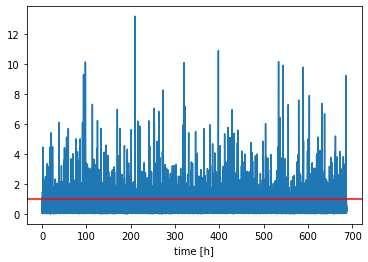

In [5]:
error_dut, error_meas = my_dut.get_errordutcount()
print("Total: ",t, "s ", x+1, " ( ", error_count, " | ", error_dut, " | ", error_meas, " ) ==> ", (x+1-error_count)/(x+1) )

# write json log
# outfile = open('result.json', 'w')
# json.dump(data, outfile, indent=2)

# plot results
timeAxis = [x / 3600. for x in X]
plt.xlabel('time [h]')
plt.plot(timeAxis,Y)
plt.axhline(y=1., xmin=0, xmax=1, color='r')
plt.show()